In [2]:
import pandas as pd

In [56]:
drug_data = pd.read_csv(r'f:\LPI lessons\AI\machinelearning\drug200.csv')
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [7]:
drug_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [57]:
df_drug = drug_data.copy()

In [59]:
from sklearn.preprocessing import LabelEncoder

df_drug.Sex = LabelEncoder().fit_transform(df_drug.Sex)
df_drug.BP = LabelEncoder().fit_transform(df_drug.BP)
df_drug.Cholesterol = LabelEncoder().fit_transform(df_drug.Cholesterol)

df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [43]:
import matplotlib.pyplot as plt

In [1]:
from sklearn.model_selection import train_test_split

In [121]:
X = df_drug.drop("Drug", axis=1)
y = df_drug["Drug"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


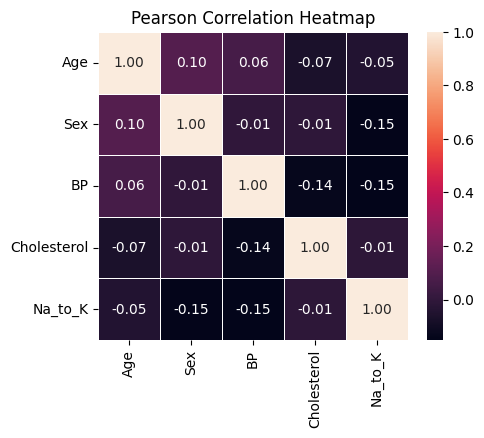

In [202]:
import seaborn as sns

spearman_matrix = X.corr(method='spearman')
plt.figure(figsize=(5, 4))
sns.heatmap(spearman_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [192]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [193]:
drug_classifier = DecisionTreeClassifier()

drug_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [194]:
y_pred = drug_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       0.80      1.00      0.89         4
       drugB       1.00      0.83      0.91         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.88      0.93         8

    accuracy                           0.95        40
   macro avg       0.95      0.94      0.94        40
weighted avg       0.96      0.95      0.95        40



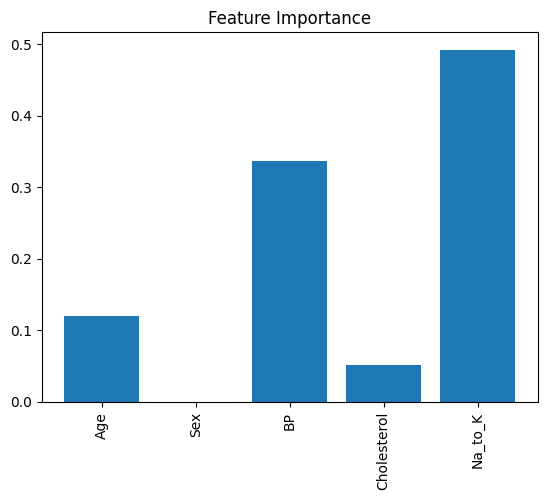

In [195]:
feature_importance = drug_classifier.feature_importances_

plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), X.columns, rotation='vertical')
plt.title('Feature Importance')
plt.show()

In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn.model_selection import GridSearchCV

In [198]:
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 5, 10],
}

In [199]:
grid_search = GridSearchCV(estimator=drug_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       0.80      1.00      0.89         4
       drugB       1.00      0.83      0.91         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.88      0.93         8

    accuracy                           0.95        40
   macro avg       0.95      0.94      0.94        40
weighted avg       0.96      0.95      0.95        40



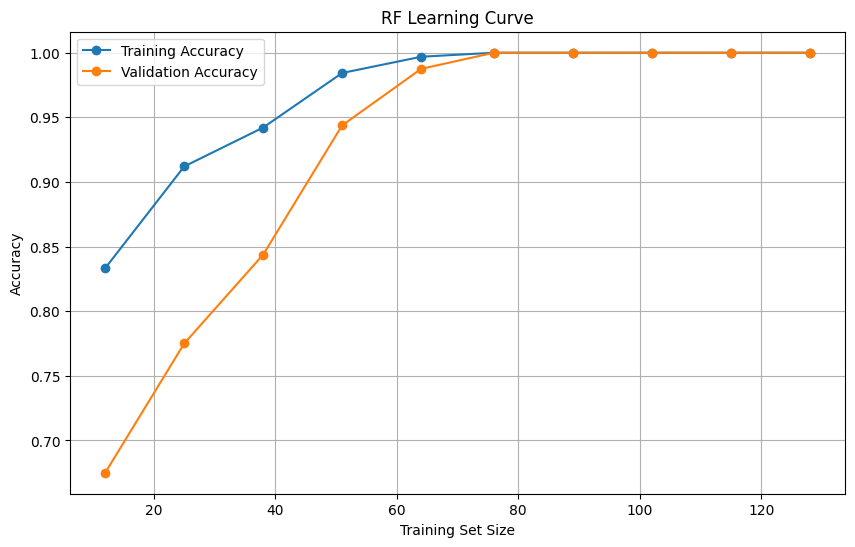

In [200]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', marker='o')

plt.title('RF Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [28]:
from sklearn.svm import SVC

In [182]:
svm_classifier = SVC(kernel='linear', C=1.0, gamma='scale')  

svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [183]:
y_pred = svm_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

       DrugY       0.94      0.94      0.94        18
       drugA       0.57      1.00      0.73         4
       drugB       0.75      0.50      0.60         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.88      0.93         8

    accuracy                           0.88        40
   macro avg       0.85      0.86      0.84        40
weighted avg       0.89      0.88      0.87        40



In [184]:
param_grid = {'C': [0.5, 1, 5, 10, 20, 40], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Best Parameters: {'C': 20, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

       DrugY       0.94      0.94      0.94        18
       drugA       0.80      1.00      0.89         4
       drugB       0.83      0.83      0.83         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.88      0.93         8

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



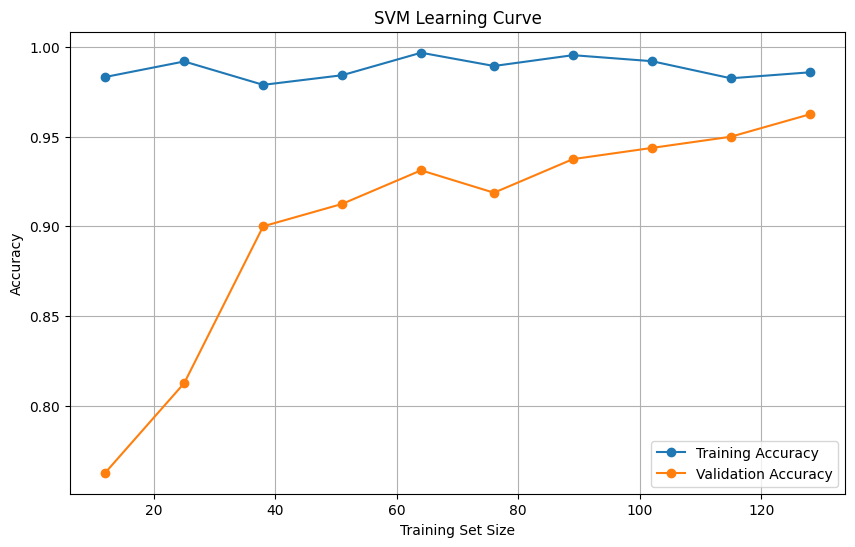

In [188]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    svm_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', marker='o')

plt.title('SVM Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
knn_classifier = KNeighborsClassifier(n_neighbors=5) 

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [175]:
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.725
Classification Report:
              precision    recall  f1-score   support

       DrugY       0.76      0.72      0.74        18
       drugA       0.50      1.00      0.67         4
       drugB       0.60      0.50      0.55         6
       drugC       0.67      0.50      0.57         4
       drugX       1.00      0.88      0.93         8

    accuracy                           0.73        40
   macro avg       0.71      0.72      0.69        40
weighted avg       0.75      0.72      0.73        40



In [176]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}


grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


best_knn_model = grid_search.best_estimator_
y_pred_best = best_knn_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print(f"Accuracy with Best Model: {accuracy_best}")
print("Classification Report with Best Model:")
print(report_best)

Best Parameters: {'n_neighbors': 3}
Accuracy with Best Model: 0.8
Classification Report with Best Model:
              precision    recall  f1-score   support

       DrugY       1.00      0.61      0.76        18
       drugA       0.50      1.00      0.67         4
       drugB       0.71      0.83      0.77         6
       drugC       1.00      1.00      1.00         4
       drugX       0.80      1.00      0.89         8

    accuracy                           0.80        40
   macro avg       0.80      0.89      0.82        40
weighted avg       0.87      0.80      0.80        40



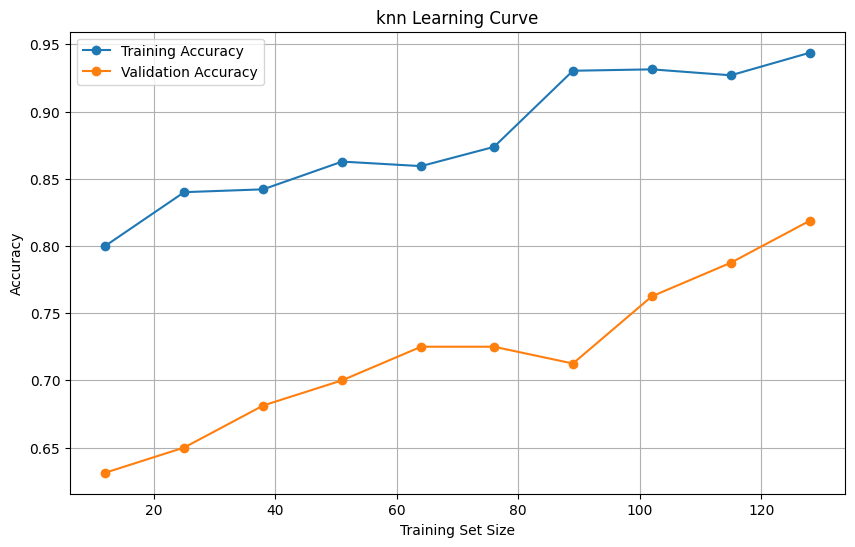

In [189]:
train_sizes, train_scores, test_scores = learning_curve(
    best_knn_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', marker='o')

plt.title('knn Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()